In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
random.seed(42)


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Datasets/Customer_Data.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [6]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [7]:
'''
columns_to_visualize = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
    'PRC_FULL_PAYMENT', 'TENURE'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(data=df, x=column)
    plt.title(column)

plt.tight_layout()
plt.show()
'''

"\ncolumns_to_visualize = [\n    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',\n    'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',\n    'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',\n    'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',\n    'PRC_FULL_PAYMENT', 'TENURE'\n]\n\nplt.figure(figsize=(15, 10))\nfor i, column in enumerate(columns_to_visualize, 1):\n    plt.subplot(4, 5, i)\n    sns.boxplot(data=df, x=column)\n    plt.title(column)\n\nplt.tight_layout()\nplt.show()\n"

In [8]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


    - There are missing values in CREDIT_LIMIT (1 missing value) and MINIMUM_PAYMENTS (313 missing values).
    - Most columns have a massive number of 0 values. Moreover, most columns are highly right-skewed, as seen from the histograms and the comparison of mean and median values (the mean value are smaller than the median value).

DATA PREPROCESSING

In [9]:
df.dropna(inplace= True, axis=0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

In [11]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

[]


Univariate Analysis

What is the Purchases distribution?

    Analysis: Visualizing the distribution of 'PURCHASES' to understand the overall pattern of purchase behavior.

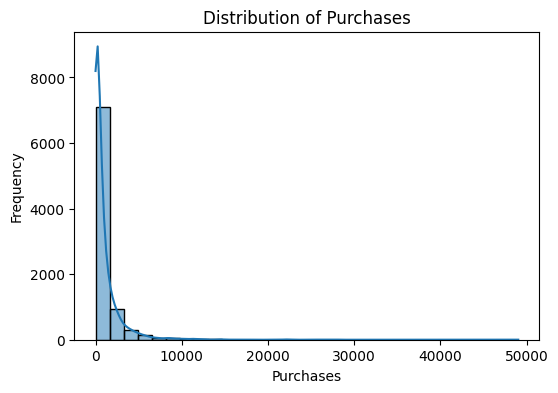

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

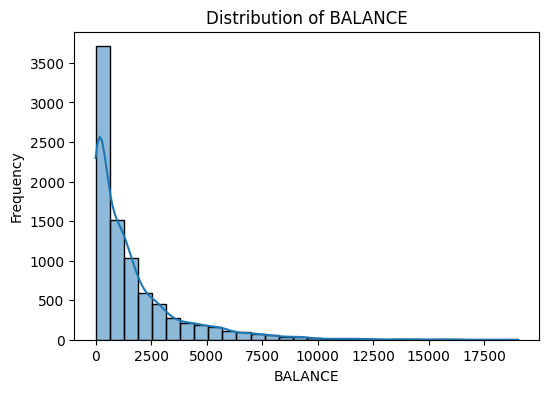

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.show()

In [14]:
top_ten_oneoff_purchases = df.sort_values(by='ONEOFF_PURCHASES', ascending=False).head(10)

print("Top Ten Purchases in 'ONEOFF_PURCHASES':")
print(top_ten_oneoff_purchases[['CUST_ID', 'ONEOFF_PURCHASES']])


Top Ten Purchases in 'ONEOFF_PURCHASES':
     CUST_ID  ONEOFF_PURCHASES
550   C10574          40761.25
501   C10523          40624.06
3937  C14048          34087.73
1604  C11657          33803.84
273   C10284          26547.43
7046  C17237          26514.32
1447  C11495          25122.77
1256  C11300          24543.52
587   C10611          23032.97
507   C10529          22257.39


In [15]:
bottom_ten_minimum_payments = df.sort_values(by='MINIMUM_PAYMENTS').head(10)

print("Bottom Ten Purchases with 'MINIMUM_PAYMENTS':")
print(bottom_ten_minimum_payments[['CUST_ID', 'MINIMUM_PAYMENTS']])


Bottom Ten Purchases with 'MINIMUM_PAYMENTS':
     CUST_ID  MINIMUM_PAYMENTS
1978  C12041          0.019163
7927  C18142          0.037744
3787  C13895          0.055880
8014  C18231          0.059481
1419  C11467          0.117036
5875  C16040          0.261984
8713  C18950          0.311953
7678  C17884          0.319475
7971  C18187          1.113027
4332  C14453          1.334075


Bivariate Analysis

Tenure vs. BALANCE?

    Analysis: Analyzing the relationship between 'TENURE' and 'BALANCE' to determine if the duration of the credit card service (tenure) impacts the balance maintained by customers. 

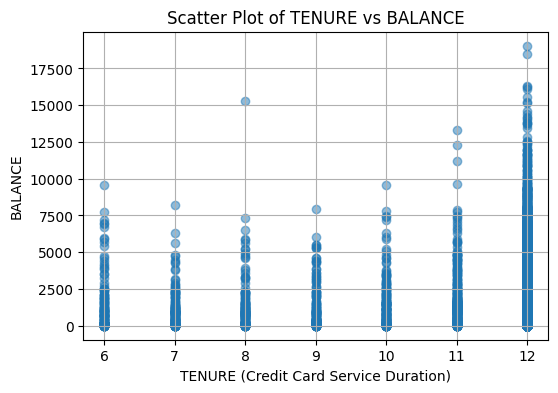

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs BALANCE')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

TENURE vs. CREDIT LIMIT:

    Analysis: Exploring how 'TENURE' is related to 'CREDIT LIMIT' to understand how the duration of the credit card service impacts the credit limits assigned to customers.

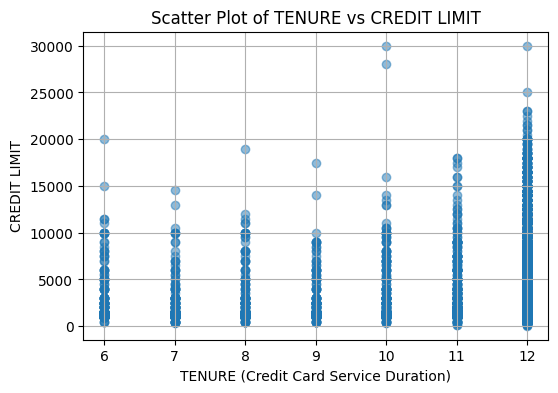

In [17]:
# Create a scatter plot of 'TENURE' vs 'CREDIT LIMIT'
plt.figure(figsize=(6,4))
plt.scatter(df['TENURE'], df['CREDIT_LIMIT'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs CREDIT LIMIT')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('CREDIT LIMIT')
plt.grid(True)
plt.show()

Investigate the relationship between 'CREDIT LIMIT' and 'BALANCE' to understand whether customers utilize their credit limits effectively or if they tend to maintain lower balances.

    Analysis: Created a scatter plot to explore the relationship between 'CREDIT LIMIT' and 'BALANCE' to see how customers with varying credit limits manage their balances.

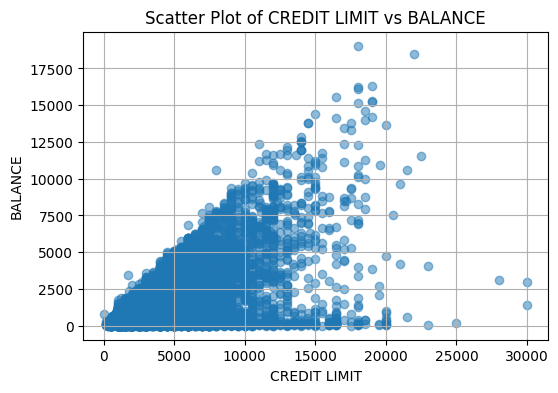

In [18]:
# Create a scatter plot of 'CREDIT LIMIT' vs 'BALANCE'
plt.figure(figsize=(6, 4))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of CREDIT LIMIT vs BALANCE')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

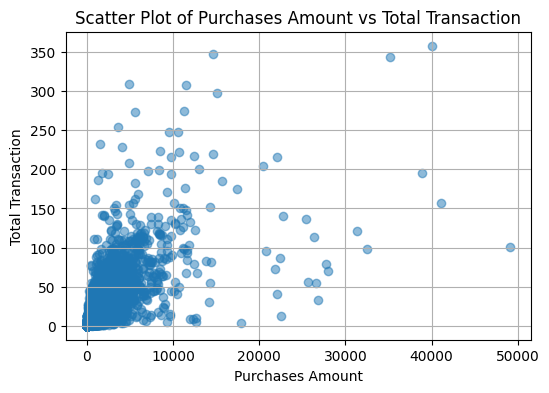

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(df['PURCHASES'], df['PURCHASES_TRX'], alpha=0.5)
plt.title('Scatter Plot of Purchases Amount vs Total Transaction')
plt.xlabel('Purchases Amount')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.show()

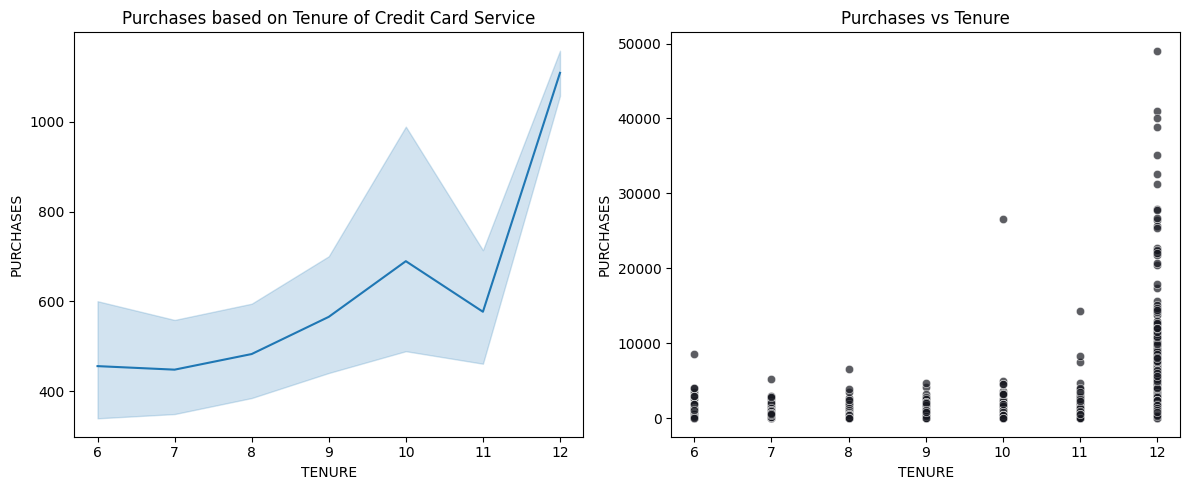

In [20]:
plt.figure(figsize=(12, 5))

# Line plot of Purchases based on Tenure
plt.subplot(1, 2, 1)
sns.lineplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Purchases based on Tenure of Credit Card Service')

# Scatter plot of Purchases vs Tenure
plt.subplot(1, 2, 2)
sns.scatterplot(x='TENURE', y='PURCHASES', data=df, color='#171820', alpha=0.7)
plt.title('Purchases vs Tenure')

plt.tight_layout()
plt.show()

In [21]:
numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])
df[numerical_features] = preprocessor.fit_transform(df[numerical_features])

In [22]:
df.drop(['CUST_ID'], inplace=True, axis=1)

In [23]:
from sklearn.decomposition import PCA
import numpy as np

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df)

# The transformed data is an array, convert it back into a dataframe
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca.head()

Explained variance ratio: [2.72311770e-01 2.03743076e-01 8.91833372e-02 7.57360860e-02
 6.27661816e-02 5.71278613e-02 4.91618788e-02 4.21073427e-02
 3.68169669e-02 3.08150790e-02 2.36380362e-02 1.77453962e-02
 1.42671026e-02 1.17865972e-02 1.00809717e-02 2.71162672e-03
 6.90045972e-07]
Cumulative explained variance ratio: [0.27231177 0.47605485 0.56523818 0.64097427 0.70374045 0.76086831
 0.81003019 0.85213753 0.8889545  0.91976958 0.94340762 0.96115301
 0.97542011 0.98720671 0.99728768 0.99999931 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144,-0.073513,-0.197110,0.137454,0.046683,-0.000168
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741,-0.055471,-0.696165,-0.558965,-0.085698,0.000007
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779,0.685713,0.008418,0.221006,0.516991,0.000021
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286,-0.031707,-0.051778,0.290624,-0.071753,-0.000074
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570,0.491517,-0.082598,0.163826,0.131205,-0.000344


95% of the total variance can be seen by including the first 12 principal components.

In [24]:
df_pca = df_pca.iloc[:,0:12]

In [25]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,-1.696395,-1.122584,0.491562,0.719521,0.079830,0.118234,0.808993,-0.093970,-0.016190,-0.082402,-0.216529,-0.053144
1,-1.215681,2.435638,0.694658,-0.098843,0.803019,-0.917777,-0.322969,-0.045119,0.754617,-0.748468,-0.878351,-0.592741
2,0.935853,-0.385202,-0.025953,1.293844,-1.987285,-0.682139,-1.624721,0.073401,-0.837066,-0.034854,-0.746798,0.695779
3,-1.614638,-0.724586,0.272358,1.086116,-0.427814,0.082982,0.687001,0.063548,0.566940,-0.083532,-0.466749,-0.119286
4,0.223701,-0.783610,-1.184434,0.721353,0.801243,0.525879,0.788893,-0.089942,0.365857,-0.192647,-0.194651,0.332570


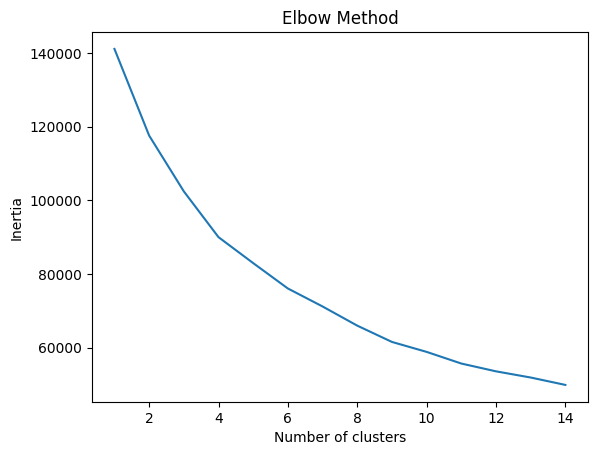

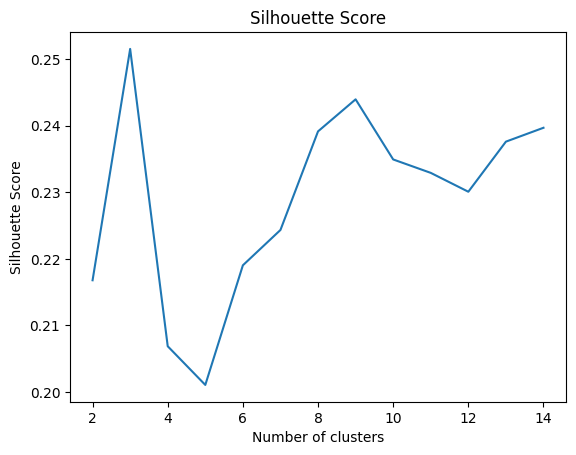

In [26]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_pca, labels)]

# Silhouette Score
plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

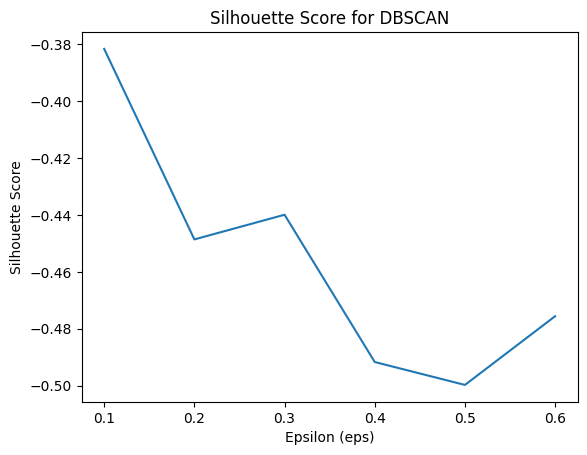

In [27]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]  
silhouette_avg = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(df_pca)
    
    if len(set(labels)) > 1:  
        silhouette_avg.append(silhouette_score(df_pca, labels))
    else:
        silhouette_avg.append(0)

plt.plot(eps_values, silhouette_avg)
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

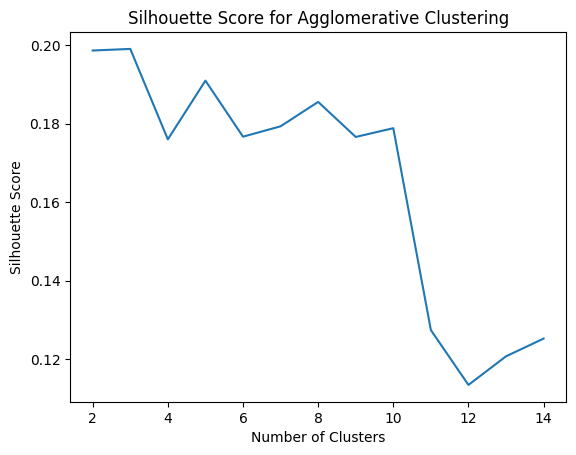

In [28]:
n_clusters_range = range(2, 15)
silhouette_avg = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(df_pca)
    
    if len(set(labels)) > 1: 
        silhouette_avg.append(silhouette_score(df_pca, labels))
    else:
        silhouette_avg.append(0)

plt.plot(n_clusters_range, silhouette_avg)
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()
